# **SMS** **SPAM** **Classification**







# Download the dataset "spam.csv"
# Import required library





In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sqn
from keras.utils import pad_sqns
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

#Read the Dataset





In [6]:
df = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#  Preprocessing the Dataset

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [11]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sqns = tok.texts_to_sqns(X_train)
sqns_matrix = pad_sqns(sqns,maxlen=max_len)

#Create Model & Add Layers

In [12]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

#  Compile the Model

In [14]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#  Fit the Model

In [15]:
history = model.fit(sqns_matrix,Y_train,batch_size=20,epochs=15,
          validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 35s 188ms/step - loss: 0.1792 - accuracy: 0.9453 - val_loss: 0.0774 - val_accuracy: 0.9809
Epoch 2/15
168/168 [==============================] - 31s 187ms/step - loss: 0.0398 - accuracy: 0.9907 - val_loss: 0.0672 - val_accuracy: 0.9821
Epoch 3/15
168/168 [==============================] - 30s 177ms/step - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.0790 - val_accuracy: 0.9856
Epoch 4/15
168/168 [==============================] - 31s 186ms/step - loss: 0.0146 - accuracy: 0.9973 - val_loss: 0.0865 - val_accuracy: 0.9856
Epoch 5/15
168/168 [==============================] - 30s 178ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1151 - val_accuracy: 0.9856
Epoch 6/15
168/168 [==============================] - 30s 180ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.1139 - val_accuracy: 0.9821
Epoch 7/15
168/168 [==============================] - 30s 176ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.1210 - val_ac

In [16]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

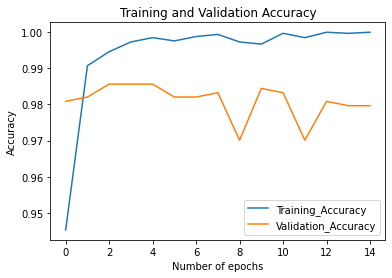

In [17]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'Accuracy')

#  Save the Model

In [18]:
model.save('A4Spam_sms_classifier.h5')


#  Test the Model

In [19]:
test_sqns = tok.texts_to_sqns(X_test)
test_sqns_matrix = pad_sqns(test_sqns,maxlen=max_len)

In [20]:
accuracy1 = model.evaluate(test_sqns_matrix,Y_test)

44/44 [==============================] - 3s 79ms/step - loss: 0.1680 - accuracy: 0.9813


In [21]:
print(' loss: {:0.4f}'.format(accuracy1[0]))
print(' Accuracy: {:0.4f}'.format(accuracy1[1]))

 loss: 0.1680
 Accuracy: 0.9813
